In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


fn="../prices.txt"
df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
prices = (df.values).T

nInst ,T = 50,750

## Time series differncing 

In [213]:
t = 750
tx = np.linspace(1,t,t)
pdiff = np.zeros((nInst,t))
for i in range(nInst):
    current = prices[i,:t]
    previous = np.zeros((t,))
    previous[0] = 1e-8
    previous[1:] = current[:-1]
    delta = current-previous
    pdiff[i,:] = delta

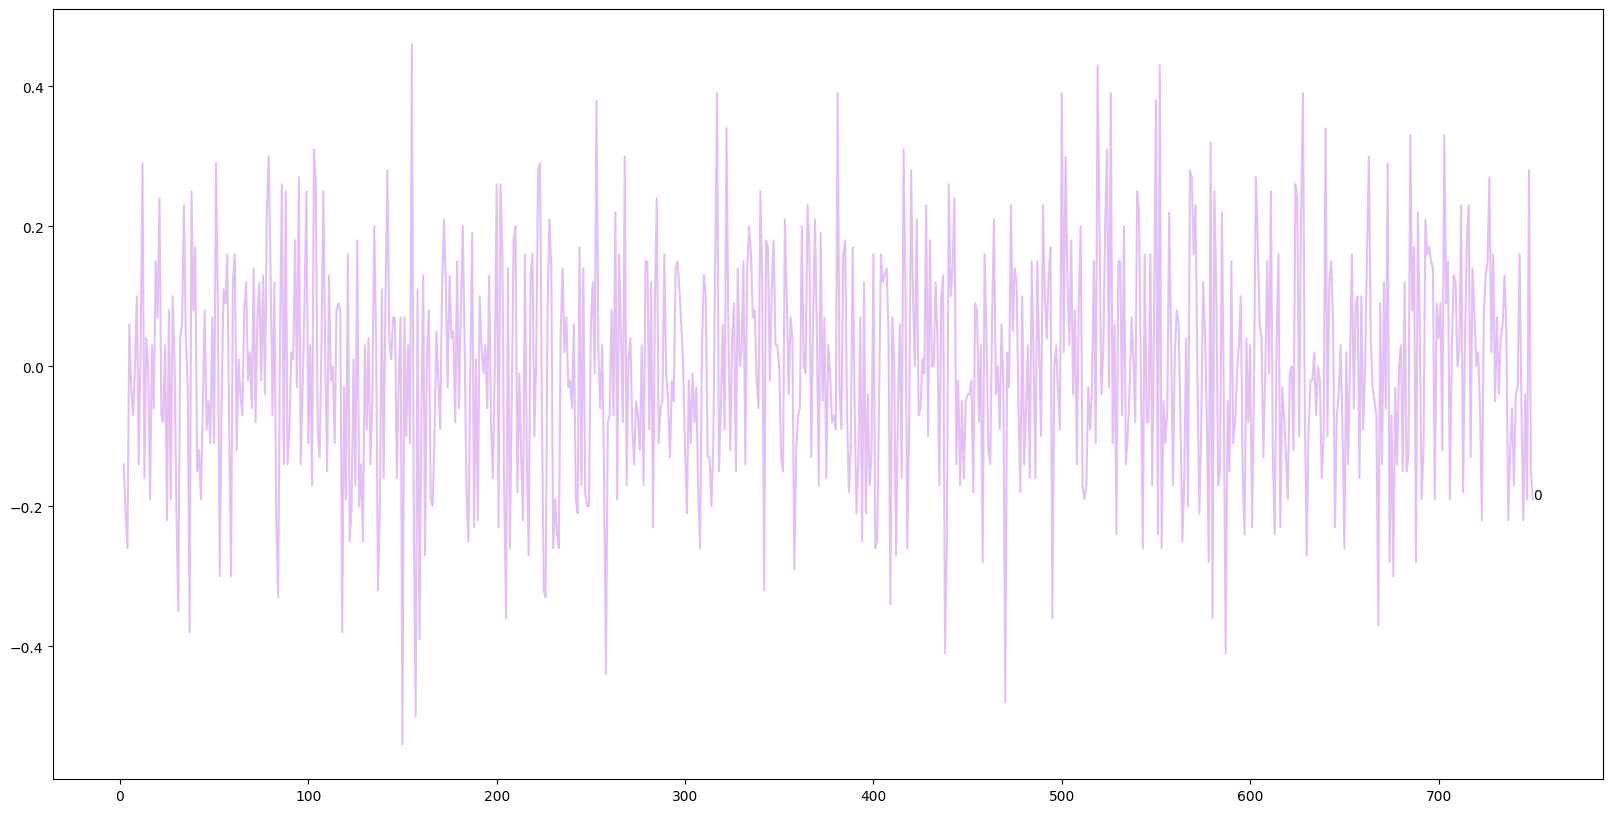

In [214]:

colors = np.random.rand(nInst, 3)
def plotSplit():
    f,ax = plt.subplots(figsize=(20,10))
    for i in [0]:
        ax.plot(tx[1:], pdiff[i][1:],alpha=0.3,color=colors[i])
        lastDiff = pdiff[i][-1]
        lastT = tx[-1]
        ax.text(lastT,lastDiff,str(i))
    plt.show()
plotSplit()

# ARIMA

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  600
Model:             ARIMA(6, 1, 2)x(1, 1, [1], 7)   Log Likelihood                -325.565
Date:                           Sat, 28 Jun 2025   AIC                            673.129
Time:                                   21:36:04   BIC                            721.348
Sample:                                        0   HQIC                           691.911
                                           - 600                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0526      1.049     -0.050      0.960      -2.108       2.003
ar.L2          0.9425      0.955      0.987

c:\Users\heroi\Code\Workspace\2025-algothon\tf\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


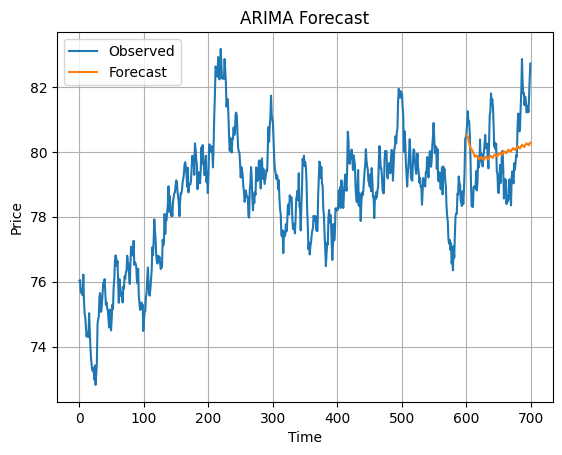

[]

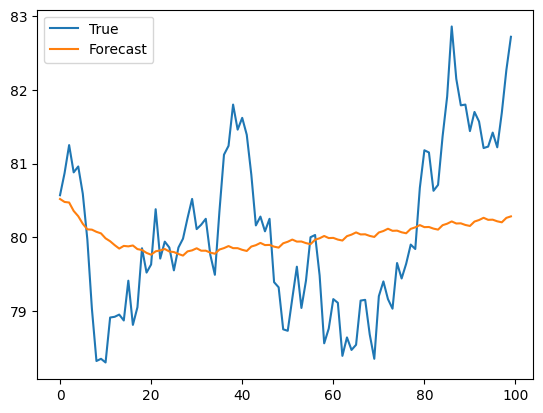

In [ ]:
instrument = 48
day = 600

# Simulated example price series
instPrice = prices[instrument,:day]

# Step 1: Define the ARIMA model
# ARIMA(p,d,q): 
#   p = AR order
#   d = differencing order
#   q = MA order
model = ARIMA(instPrice, order=(6,1,2),seasonal_order=(1,1,1,7))  # This (1,1,1) is a common starting point

# Step 2: Fit the model
model_fit = model.fit()

# Step 3: Print summary (optional)
print(model_fit.summary())

# Step 4: Forecast future prices
forecast_steps = 50
forecast = model_fit.forecast(steps=forecast_steps)

# Step 5: Plot
groundTruth = prices[instrument,:day+forecast_steps]
plt.plot(np.arange(len(groundTruth)), groundTruth, label='Observed')
plt.plot(np.arange(len(instPrice), len(instPrice)+forecast_steps), forecast, label='Forecast')
plt.legend()
plt.title("ARIMA Forecast")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()
predictedRegionTrue = prices[instrument,day:day+forecast_steps]
plt.plot(np.arange(len(forecast)),predictedRegionTrue,label="True")
plt.plot(np.arange(len(forecast)),forecast,label="Forecast")
plt.legend()
plt.plot()
